In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

# Problem 1

*In an unweighted graph, which algorithm, DFS and/or BFS is guaranteed to find the optimal shortest path? Include an example.*

BFS is guaranteed to find shortest path, and as an example we can use the following graph.

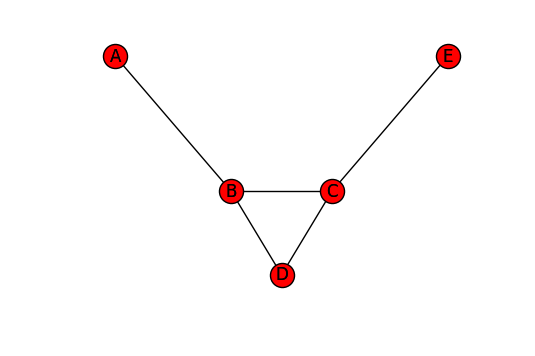

In [4]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'),
                  ('B', 'D'), ('C', 'D'),
                  ('C', 'E')])
layout = nx.spectral_layout(G)
nx.draw_networkx(G, layout)
nx.draw_networkx_labels(G, layout)
plt.axis('off')
plt.show()

If we start from the node $A$ and try to find the shortest path to $E$, by DFS a possible route could be $A \to B \to D \to C \to E$, but by BFS the optimal route will be found first.

# Problem 2

*Consider a state space where the start state is the number 1 and the successor function for state $n$ returns two states $2n$ and $2n+1$*

*A) Draw the portion of the state space for states $1$ to $15$.*


In [21]:
[1] + [[2 * (i + 1), 2 * (i + 1) + 1] for i in range(14)]

[1,
 [2, 3],
 [4, 5],
 [6, 7],
 [8, 9],
 [10, 11],
 [12, 13],
 [14, 15],
 [16, 17],
 [18, 19],
 [20, 21],
 [22, 23],
 [24, 25],
 [26, 27],
 [28, 29]]

*For a goal state of 11, list the order in which nodes will be visited for BFS, DLS with limit 3, and iterative deepening search.*

1) BFS

In [27]:
list(range(1,12))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

2) DLS

In [29]:
[1] + list(range(2, 12, 2)) + list(range(3, 12, 2))

[1, 2, 4, 6, 8, 10, 3, 5, 7, 9, 11]

3) Iterative Deepening

In [33]:
for i in range(1, 12):
    print([1] + list(range(2, 2 * i, 2)) + list(range(3, 2 * i + 1, 2)))

[1]
[1, 2, 3]
[1, 2, 4, 3, 5]
[1, 2, 4, 6, 3, 5, 7]
[1, 2, 4, 6, 8, 3, 5, 7, 9]
[1, 2, 4, 6, 8, 10, 3, 5, 7, 9, 11]
[1, 2, 4, 6, 8, 10, 12, 3, 5, 7, 9, 11, 13]
[1, 2, 4, 6, 8, 10, 12, 14, 3, 5, 7, 9, 11, 13, 15]
[1, 2, 4, 6, 8, 10, 12, 14, 16, 3, 5, 7, 9, 11, 13, 15, 17]
[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


# Problem 3

*The DFS algorithm in notes includes a visited property. Explain why visited exists. Use the following graph to provide an example.*

If we don't have a visted property, we run the risk of getting caught in a loop. With the given graph, if there is no visited property, and we're trying to find shortest path from $F$ to $D$, we'll get stuck in the following loop.

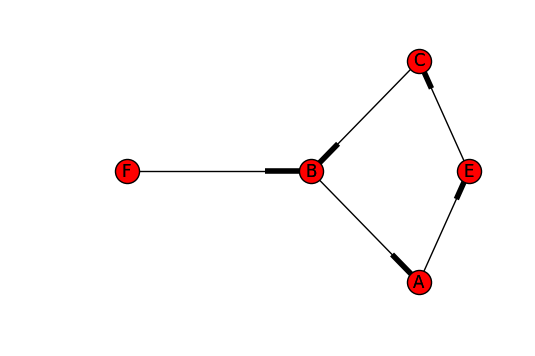

In [24]:
G = nx.DiGraph()
G.add_edges_from([('F', 'B'), ('B', 'A'),
                  ('A', 'E'), ('E', 'C'),
                  ('C', 'B')])
layout = nx.spectral_layout(G)
nx.draw_networkx(G, layout)
nx.draw_networkx_labels(G, layout)
plt.axis('off')
plt.show()

# Problem 4

*Iterative Deepening DFS restarts at the top of the tree on each iteration. Explain how the algorithm could be modified to restart at the current search depth instead of the root.*

From the notes, the algorithm is as follows.

```
IterativeDeepening(vertex, goal, maxDepth)
     for x = 0 to maxDepth
          result = DLS(vertex, goal, x)
          if result is not failure or cutoff
               return result
     return failure

DLS(vertex, goal, depth)
    if vertex.key == goal
       return vertex
    if depth == 0
       return cutoff  //some value for cutoff needs to be set
    vertex.visited = true
    cutoff_occurred = false
    for each v in vertex.adjacent
         if(!v.visited)
             v.parent = vertex
             result = DLS(v, goal, depth--)
             if result == cutoff
                 cutoff_occurred = true
             else if result != failure
                 return result
    if cutoff_occurred
        return cutoff
    else
        return failure
```

If we want to make it restart at current search depth each time, then we have to  keep track of the nodes at each cutoff level, and recursively restart for each of those in order. This would involve specifically adding a recursive element to the `IterativeDeepening` algorithm.

```
IterativeDeepeningRestart(root, goal, maxDepth)
    result, vertices = IterativeDeepening(root, goal, maxDepth)
    while vertices is not empty:
        result, new_vertices = IterativeDeepening(vertices.pop(), goal, maxDepth)
        vertices += new_vertices
        if result is goal:
            return success
    return failure
    
IterativeDeepening(vertex, goal, maxDepth)
     for x = 0 to maxDepth
          result = DLS(vertex, goal, x)
          if result is not failure or cutoff
               return result
     return failure

DLS(vertex, goal, depth)
    if vertex.key == goal
       return vertex, []
    if depth == 0
       return cutoff, []  //some value for cutoff needs to be set
    vertex.visited = true
    cutoff_occurred = false
    for each v in vertex.adjacent
         if(!v.visited)
             v.parent = vertex
             result = DLS(v, goal, depth--)
             if result == cutoff
                 cutoff_occurred = true
             else if result != failure
                 return result, vertex.adjacent
    if cutoff_occurred
        return cutoff, last_vertex.adjacent
    else
        return failure, last_vertex_adjacent
```

# Problem 5

*Explain why True/False: Every node in the list of solved nodes in Dijkstra's algorithm is part of the final solution.*

True, as we specifically care about the shortest path from nodes $A$ and $B$, and we need to keep track of these nodes.